# Explore here

In [10]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

 
df.rename(columns={"19-Oct": "9-10"}, inplace=True)

 
print(df.head())

 
df.info()

   fips  TOT_POP    0-9  0-9 y/o % of total pop   9-10  \
0  1001    55601   6787               12.206615   7637   
1  1003   218022  24757               11.355276  26913   
2  1005    24881   2732               10.980266   2960   
3  1007    22400   2456               10.964286   2596   
4  1009    57840   7095               12.266598   7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2             

               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

               9-10  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.

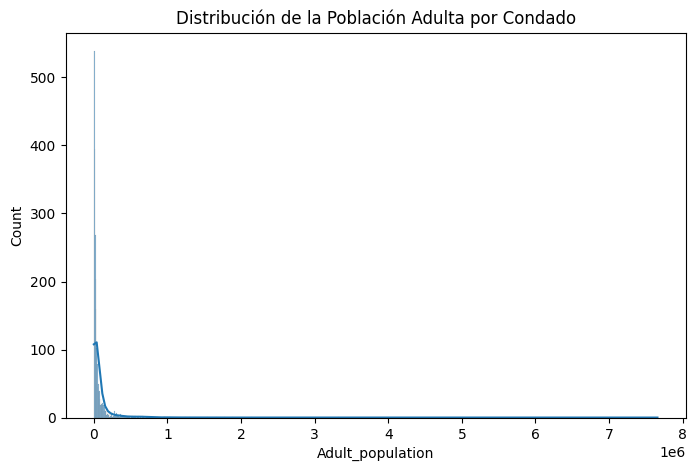

Valores nulos por columna:
fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
9-10                      0
                         ..
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Adult_population          0
Length: 109, dtype: int64
Tamaño de entrenamiento: (2512, 1996), Tamaño de prueba: (628, 1996)


In [ ]:


# Calcular la población adulta (20 años en adelante)
df["Adult_population"] = df["20-29"] + df["30-39"] + df["40-49"] + df["50-59"] + df["60-69"] + df["70-79"] + df["80+"]

 
print(df.describe())

# Distribución de la población adulta
plt.figure(figsize=(8,5))
sns.histplot(df["Adult_population"], kde=True)
plt.title("Distribución de la Población Adulta por Condado")
plt.show()

 
print("Valores nulos por columna:")
print(df.isnull().sum())

 
df = pd.get_dummies(df, drop_first=True)

 
X = df.drop(columns=["Adult_population"])  # Variable objetivo
y = df["Adult_population"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")


Modelo Lineal - MAE: 0.00, MSE: 0.00, R²: 1.00


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


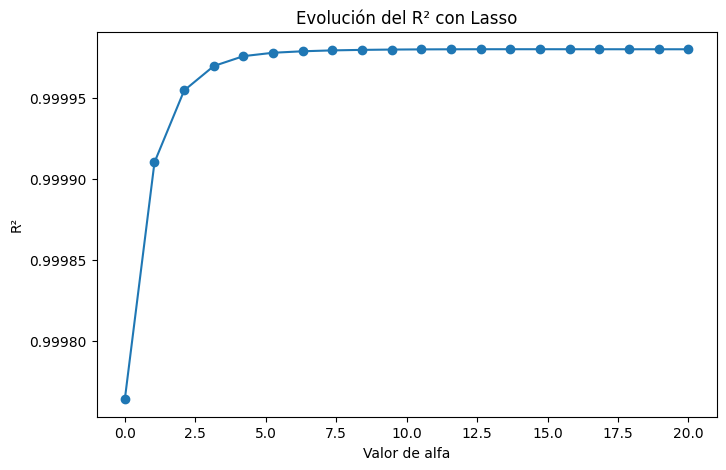

In [12]:
 

 
model = LinearRegression()
model.fit(X_train, y_train)

 
y_pred = model.predict(X_test)

 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Modelo Lineal - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

 
alphas = np.linspace(0, 20, 20)
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_lasso))
 
plt.figure(figsize=(8,5))
plt.plot(alphas, r2_scores, marker='o', linestyle='-')
plt.xlabel("Valor de alfa")
plt.ylabel("R²")
plt.title("Evolución del R² con Lasso")
plt.show()

In [13]:
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 
lasso_opt = Lasso(alpha=5.0)
lasso_opt.fit(X_train_scaled, y_train)

 
y_pred_lasso_opt = lasso_opt.predict(X_test_scaled)

 
mae_lasso_opt = mean_absolute_error(y_test, y_pred_lasso_opt)
mse_lasso_opt = mean_squared_error(y_test, y_pred_lasso_opt)
r2_lasso_opt = r2_score(y_test, y_pred_lasso_opt)

print(f"Modelo Lasso Optimizado - MAE: {mae_lasso_opt:.2f}, MSE: {mse_lasso_opt:.2f}, R²: {r2_lasso_opt:.2f}")

Modelo Lasso Optimizado - MAE: 1180.27, MSE: 6514800.68, R²: 1.00
